In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

Importare 'Completo.csv'

In [2]:
df_1 = pd.read_csv('Ultimate2.csv')

In [3]:
comp = pd.read_csv('Completo.csv')

In [4]:
df_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'new_value', 'Region',
       'Happiness Rank'],
      dtype='object')

In [5]:
df_1= df_1.rename(columns={'new_value':'Indice di Povertá'})

In [6]:
eu1 = pd.read_csv('eu_countries.csv')
Average_working = pd.read_csv('annual-working-hours-per-worker.csv')
Average_working = Average_working.groupby('Entity', as_index=False).mean()

In [7]:
eu = pd.merge(eu1,df_1, left_on='name', right_on='Country')

In [8]:
eu = eu.rename(columns={'Value': 'Suicide Rate'})

Lasciare cosi

In [9]:
df_2 = pd.merge(df_1, Average_working, left_on='Country', right_on='Entity')

In [10]:
Average_working = Average_working.drop(['Unnamed: 0', 'Year'],axis=1)

In [11]:
df_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

In [12]:
df_1 = df_1.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [13]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [14]:
global_temp_country_clear = global_temp_country[global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())


C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


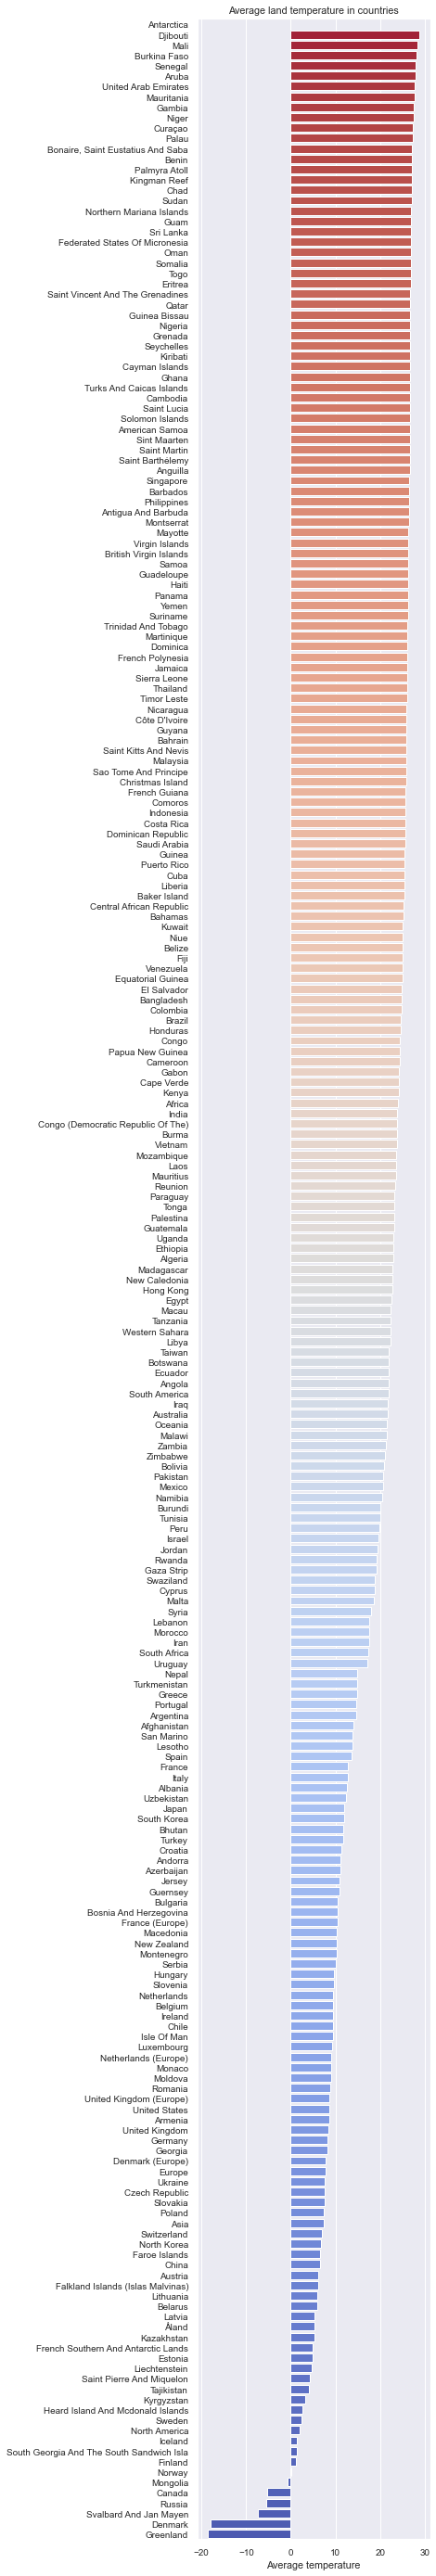

In [15]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [16]:
temp = pd.DataFrame(data={'Temperature':mean_temp_bar, 'Country':countries_bar})

In [17]:
temp = temp.drop(241)

In [18]:
df_1.columns

Index(['Country', 'Value', 'Lower_value', 'Upper_value', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

In [19]:
df_temp = pd.merge(df_1, temp, on='Country')

In [20]:
df_temp.columns

Index(['Country', 'Value', 'Lower_value', 'Upper_value', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank', 'Temperature'],
      dtype='object')

In [21]:
df_temp= df_temp.rename(columns={'Temperature':'Average Temperature'})

In [122]:
matrix.mask

<bound method Series.mask of Value                Value                       1.00
                     Lower_value                 0.94
                     Upper_value                 0.95
Lower_value          Value                       0.94
                     Lower_value                 1.00
                                                 ... 
Happiness Rank       Economy (GDP per Capita)   -0.79
                     Family                     -0.72
                     Health (Life Expectancy)   -0.77
                     Happiness Rank              1.00
Average Temperature  Average Temperature         1.00
Length: 61, dtype: float64>

In [ ]:
matrix = matrix[abs(matrix) >= 0.5]
matrix.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
corr.style.background_gradient(cmap=cmap).set_precision(2)

In [141]:
mask.shape

(17, 17)

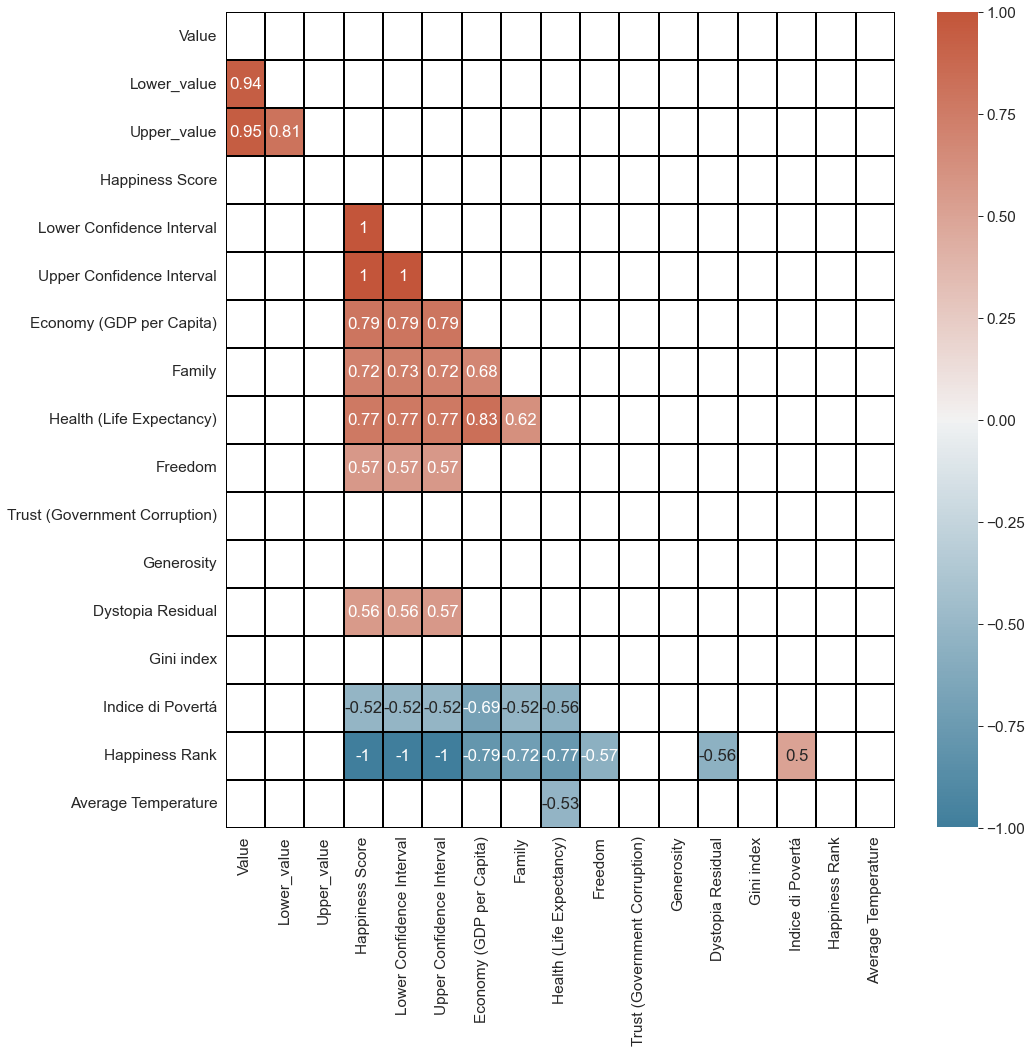

In [162]:
fig, ax = plt.subplots(figsize=(15,15)) 
matrix = df_temp.corr().round(2)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
matrix = matrix[abs(matrix) >= 0.5]
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix,linecolor='black',linewidths=0.005,vmax=1,annot=True, vmin=-1,center=0, cmap=cmap, mask=mask)
plt.show()

In [130]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df_temp[['Value','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Indice di Povertá'
       , 'Average Temperature']].corr()
corr.style.background_gradient(cmap=cmap).set_precision(2)
#4
#Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship through a shaky linear rule.
#5
#Values between 0.3 and 0.7 (0.3 and −0.7) indicate a moderate positive (negative) linear relationship through a fuzzy-firm linear rule.
#6
#Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

C:\Users\Federico\AppData\Local\Temp/ipykernel_12384/3445075440.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap=cmap).set_precision(2)


,Value,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Indice di Povertá,Average Temperature
Value,1.00,-0.07,-0.06,0.08,-0.19,0.06,-0.02,0.09,-0.27
Happiness Score,-0.07,1.00,0.79,0.72,0.77,0.57,0.42,-0.52,-0.40
Economy (GDP per Capita),-0.06,0.79,1.00,0.68,0.83,0.35,0.33,-0.69,-0.46
Family,0.08,0.72,0.68,1.00,0.62,0.43,0.19,-0.52,-0.45
Health (Life Expectancy),-0.19,0.77,0.83,0.62,1.00,0.35,0.25,-0.56,-0.53
Freedom,0.06,0.57,0.35,0.43,0.35,1.00,0.49,-0.22,-0.10
Trust (Government Corruption),-0.02,0.42,0.33,0.19,0.25,0.49,1.00,-0.09,-0.12
Indice di Povertá,0.09,-0.52,-0.69,-0.52,-0.56,-0.22,-0.09,1.00,0.33
Average Temperature,-0.27,-0.40,-0.46,-0.45,-0.53,-0.10,-0.12,0.33,1.00


In [23]:
eu = eu.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

<AxesSubplot:xlabel='Happiness Score', ylabel='Indice di Povertá'>

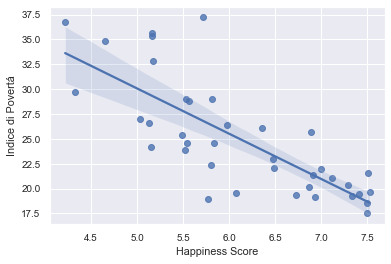

In [26]:
sns.regplot(data=eu, x='Happiness Score', y='Indice di Povertá')

In [27]:
eu = pd.merge(eu,temp, on='Country')

In [28]:
eu= eu.rename(columns={'Temperature':'Average Temperature', 'new_value':'Indice di Povertá'})

<AxesSubplot:>

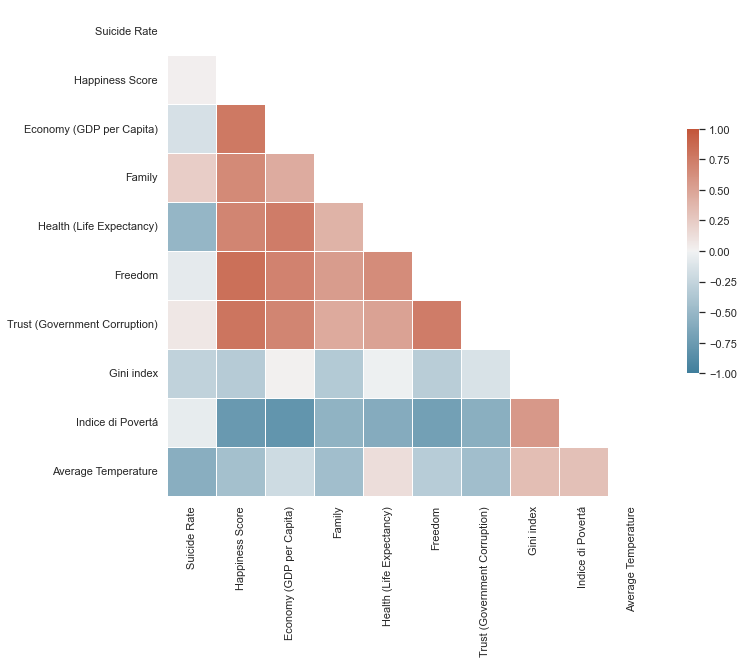

In [31]:
from string import ascii_letters

sns.set_theme(style="white")

# Compute the correlation matrix
corr = eu[['Suicide Rate','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Gini index', 'Indice di Povertá'
       , 'Average Temperature']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
corr = eu[['Suicide Rate','Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Gini index', 'Indice di Povertá'
       , 'Average Temperature']].corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
#4
#Values between 0 and 0.3 (0 and −0.3) indicate a weak positive (negative) linear relationship through a shaky linear rule.
#5
#Values between 0.3 and 0.7 (0.3 and −0.7) indicate a moderate positive (negative) linear relationship through a fuzzy-firm linear rule.
#6
#Values between 0.7 and 1.0 (−0.7 and −1.0) indicate a strong positive (negative) linear relationship through a firm linear rule.

C:\Users\Federico\AppData\Local\Temp/ipykernel_12384/1032161537.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,Suicide Rate,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Gini index,Indice di Povertá,Average Temperature
Suicide Rate,1.00,0.02,-0.15,0.23,-0.51,-0.07,0.07,-0.28,-0.05,-0.58
Happiness Score,0.02,1.00,0.77,0.66,0.69,0.82,0.80,-0.33,-0.76,-0.44
Economy (GDP per Capita),-0.15,0.77,1.00,0.45,0.75,0.71,0.69,0.01,-0.80,-0.20
Family,0.23,0.66,0.45,1.00,0.40,0.55,0.45,-0.35,-0.55,-0.45
Health (Life Expectancy),-0.51,0.69,0.75,0.40,1.00,0.65,0.50,-0.02,-0.60,0.13
Freedom,-0.07,0.82,0.71,0.55,0.65,1.00,0.74,-0.32,-0.71,-0.33
Trust (Government Corruption),0.07,0.80,0.69,0.45,0.50,0.74,1.00,-0.14,-0.58,-0.45
Gini index,-0.28,-0.33,0.01,-0.35,-0.02,-0.32,-0.14,1.00,0.57,0.33
Indice di Povertá,-0.05,-0.76,-0.80,-0.55,-0.60,-0.71,-0.58,0.57,1.00,0.32
Average Temperature,-0.58,-0.44,-0.20,-0.45,0.13,-0.33,-0.45,0.33,0.32,1.00


Ancora qualche passsaggio

In [35]:
df_1.head()

,Country,Value,Lower_value,Upper_value,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Gini index,Indice di Povertá,Region,Happiness Rank
0,Denmark,8.0825,6.4675,9.9800,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,28.316695,19.640094,Western Europe,1
1,Switzerland,9.9600,8.2150,11.9025,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,33.000220,21.606477,Western Europe,2
2,Iceland,11.2975,8.9675,13.9200,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,26.408963,18.511042,Western Europe,3
3,Norway,10.3750,9.4900,11.3600,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,27.649185,17.527884,Western Europe,4
4,Finland,13.8750,11.5375,16.4400,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,27.280278,19.403034,Western Europe,5


OK!!

OK

In [49]:
df_2.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Country', 'Value', 'Lower_value',
       'Upper_value', 'Unnamed: 0.1.1', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank', 'Entity', 'Unnamed: 0_y', 'Year',
       'Average annual working hours per worker'],
      dtype='object')

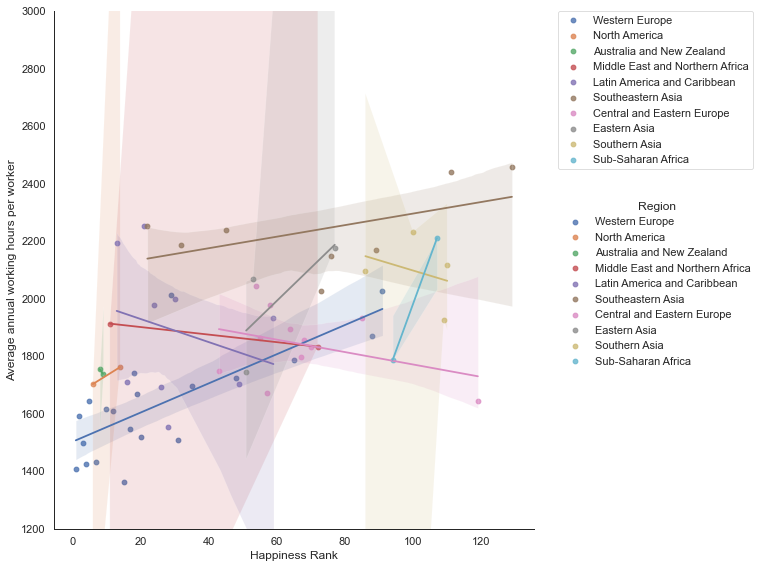

In [91]:
sns.lmplot(data=df_2, x="Happiness Rank", y="Average annual working hours per worker", hue='Region', fit_reg=True,height=8)
plt.ylim(1200,3000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


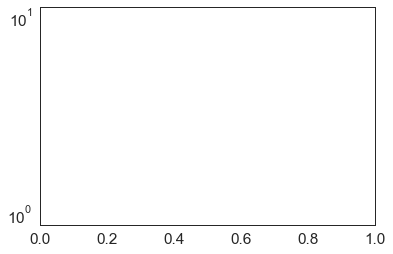

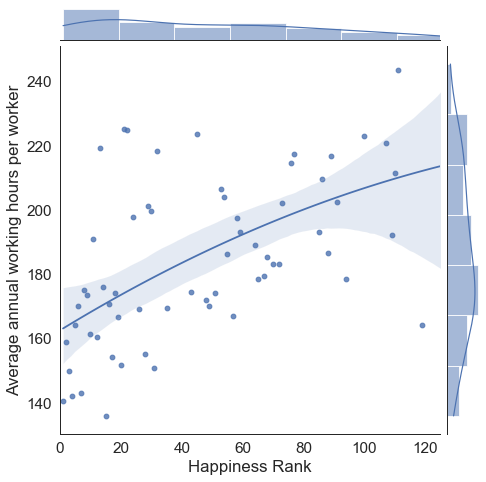

In [166]:
#Correlazione Felicitá/Tempo speso a lavorare mondo
x = df_2['Happiness Rank']
y = df_2['Average annual working hours per worker']/10
z = df_2['Economy (GDP per Capita)']
plt.yscale(value='log')
sns.set_style("white")
sns.set_context("paper", font_scale=1.75)
sns.jointplot(x, y, kind='reg', height=7,ratio=10, order=2, xlim=(0,125))
plt.show()

In [76]:
df_1.columns

Index(['Country', 'Value', 'Lower_value', 'Upper_value', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice di Povertá', 'Region',
       'Happiness Rank'],
      dtype='object')

In [77]:
df_3 = df_1[df_1["Indice di Povertá"]<200]

OK

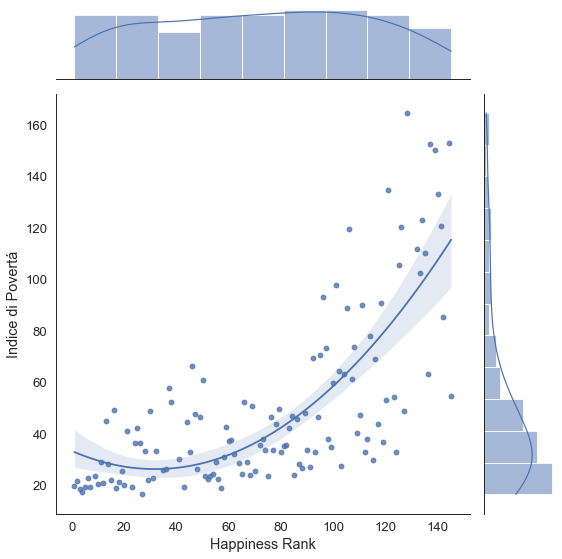

In [79]:
#Correlazione felicitá/benessere economico mondo
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)
sns.jointplot(data=df_3, x= "Happiness Rank", y="Indice di Povertá", kind='reg', order=2, height=8)
plt.xlim=(0, 160)

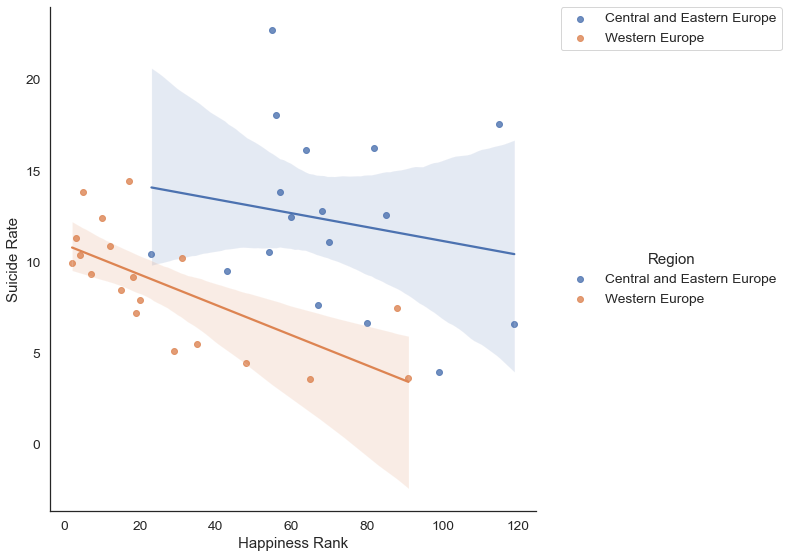

In [176]:
#Correlazione Suicidi/Gdp Europa Occidentale
sns.set_style("white")
sns.set_context(font_scale=1.25)
sns.lmplot(data=eu, x='Happiness Rank', y='Suicide Rate', hue='Region',height=8 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [61]:
eu['hue'] = eu['Upper_value'] - eu['Lower_value']

In [62]:
eu = eu.rename(columns={'hue':'Varianza'})

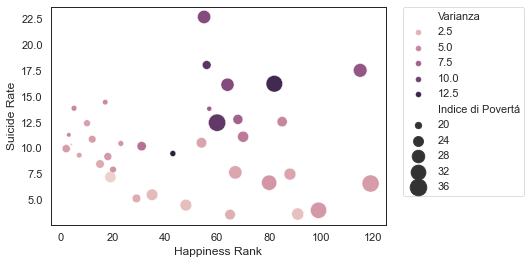

In [64]:
#Correlazione Suicidi/Indice di ricchezza Europa 
sns.set_context("paper", font_scale=1.25)
sns.scatterplot(data= eu, x='Happiness Rank', y='Suicide Rate',size='Indice di Povertá', legend=True, sizes=(5,300), hue='Varianza')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [146]:
df_1.columns

Index(['Country', 'Value', 'Lower_value', 'Upper_value', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Gini index', 'Indice Benessere Economico',
       'Region', 'Happiness Rank'],
      dtype='object')

In [147]:
alt.Chart(df_1).mark_circle(size = 100).encode(
    x='Happiness Rank',
    y='Value',
    size='Value',
    tooltip=['Happiness Rank', 'Value', 'Indice Benessere Economico','Country','Region'],
    color=alt.Color('Region:N')
).interactive()

alt.Chart(...)

In [ ]:
df_3 = df_1[df_1["Indice di Povertá"]<200]

In [ ]:
import altair as alt
from vega_datasets import data

source = data.cars()

# Brush for selection
brush = alt.selection(type='interval')

# Scatter Plot
points = alt.Chart(source).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Cylinders:O', alt.value('grey'))
).add_selection(brush)

# Base chart for data tables
ranked_text = alt.Chart(source).mark_text().encode(
    y=alt.Y('row_number:O',axis=None)
).transform_window(
    row_number='row_number()'
).transform_filter(
    brush
).transform_window(
    rank='rank(row_number)'
).transform_filter(
    alt.datum.rank<20
)

# Data Tables
horsepower = ranked_text.encode(text='Horsepower:N').properties(title='Horsepower')
mpg = ranked_text.encode(text='Miles_per_Gallon:N').properties(title='MPG')
origin = ranked_text.encode(text='Origin:N').properties(title='Origin')
text = alt.hconcat(horsepower, mpg, origin) # Combine data tables

# Build chart
alt.hconcat(
    points,
    text
).resolve_legend(
    color="independent"
)

C:\Users\Federico\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness Rank', ylabel='Value'>

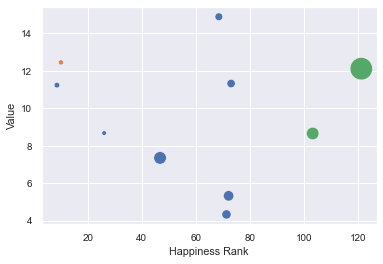

In [253]:
#Scatterplot per regioni
x1 = table_2_1['Happiness Rank']
y1 = table_2_1['Value']
z1 = table_2_1['new_value']
sns.scatterplot(x1, y1, size=z1, legend=False, sizes=(20, 500), hue=df_2['Region'])

In [126]:
alt.Chart(table_2_1).mark_circle(size=60).encode(
    x='Happiness Rank',
    y='Value',
    size='Indice di Povertá',
    tooltip=['Happiness Rank', 'Value', 'new_value', 'Region']
).interactive()

alt.Chart(...)

In [ ]:
df_1.sort_values('Value', ascending=False).head(10)

In [ ]:
df_temp.sort_values('Value', ascending=False)

<AxesSubplot:xlabel='Happiness Rank', ylabel='Value'>

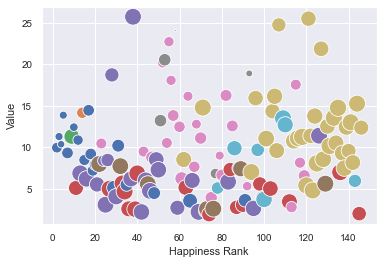

In [274]:
#Correlazione Suicidi/Temperature
sns.scatterplot(data= df_temp, x='Happiness Rank', y='Value', size='Temperature', legend=False, sizes=(5, 300), hue='Region')

In [ ]:
#Correlazione Suicidi/Gdp Europa Est
x = eu2['Happiness Rank']
y = eu2['Value']
z = eu2['Indice di Povertá']
sns.scatterplot(x, y, size=z, legend=False, sizes=(5, 300))